In [25]:
# importnado bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, roc_curve, f1_score
from sklearn.preprocessing import StandardScaler

In [26]:
# Carregar o dataset utilizado para treinamento
df = pd.read_csv('../Datasets/events.csv')

In [27]:
df

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN
...,...,...,...,...,...
2756096,1438398785939,591435,view,261427,NaN
2756097,1438399813142,762376,view,115946,NaN
2756098,1438397820527,1251746,view,78144,NaN
2756099,1438398530703,1184451,view,283392,NaN


In [28]:
# Convertando millesegundos para Datime64
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

In [29]:
# Criando coluna de conversão, onde os vericamos apenas se o item foi comprado ou não(Ignoramos a quantidade) 
#OBS: Coluna algo da nossa previsão
df['converted'] = df['transactionid'].notna().astype(int)

In [30]:
# Criando e Filtrando dados relacionados ao nosso Contexto, para realizar o Treinamento dos Modelos
visitor_data = df.groupby('visitorid').agg(
    views=('itemid', 'count'),  # Número de visualizações
    first_view=('timestamp', 'min'),  # Hora da primeira visualização
    last_view=('timestamp', 'max'),  # Hora da última visualização
    converted=('converted', 'max')  # Se houve conversão
).reset_index()

In [31]:
visitor_data

,visitorid,views,first_view,last_view,converted
0,0,3,2015-09-11 20:49:49.439,2015-09-11 20:55:17.175,0
1,1,1,2015-08-13 17:46:06.444,2015-08-13 17:46:06.444,0
2,2,8,2015-08-07 17:51:44.567,2015-08-07 18:20:57.845,0
3,3,1,2015-08-01 07:10:35.296,2015-08-01 07:10:35.296,0
4,4,1,2015-09-15 21:24:27.167,2015-09-15 21:24:27.167,0
...,...,...,...,...,...
1407575,1407575,1,2015-06-10 21:46:08.922,2015-06-10 21:46:08.922,0
1407576,1407576,1,2015-06-03 15:01:29.991,2015-06-03 15:01:29.991,0
1407577,1407577,1,2015-05-17 21:48:04.867,2015-05-17 21:48:04.867,0
1407578,1407578,1,2015-05-17 01:21:23.288,2015-05-17 01:21:23.288,0


In [32]:
# Calculando a diferença entre a primeira e a última visualização
visitor_data['view_time_diff'] = (visitor_data['last_view'] - visitor_data['first_view']).dt.total_seconds()

In [33]:
visitor_data

,visitorid,views,first_view,last_view,converted,view_time_diff
0,0,3,2015-09-11 20:49:49.439,2015-09-11 20:55:17.175,0,327.736
1,1,1,2015-08-13 17:46:06.444,2015-08-13 17:46:06.444,0,0.000
2,2,8,2015-08-07 17:51:44.567,2015-08-07 18:20:57.845,0,1753.278
3,3,1,2015-08-01 07:10:35.296,2015-08-01 07:10:35.296,0,0.000
4,4,1,2015-09-15 21:24:27.167,2015-09-15 21:24:27.167,0,0.000
...,...,...,...,...,...,...
1407575,1407575,1,2015-06-10 21:46:08.922,2015-06-10 21:46:08.922,0,0.000
1407576,1407576,1,2015-06-03 15:01:29.991,2015-06-03 15:01:29.991,0,0.000
1407577,1407577,1,2015-05-17 21:48:04.867,2015-05-17 21:48:04.867,0,0.000
1407578,1407578,1,2015-05-17 01:21:23.288,2015-05-17 01:21:23.288,0,0.000


In [34]:
# Definindo as variáveis X e y
X = visitor_data[['views', 'view_time_diff']]  
y = visitor_data['converted']  

In [35]:
# Separando os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Escalonando as variáveis de treinamento se necessário
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
# Modelo de Regressão Linear
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [38]:
# Modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [39]:
# Fazendo previsões com o modelo de Regressão Linear
y_pred_lr = lr_model.predict(X_test)

In [40]:
# Convertendo as previsões de Regressão Linear para valores binários
y_pred_lr_bin = (y_pred_lr > 0.5).astype(int)

In [41]:
# Calculando as métricas para Regressão Linear
accuracy_lr = accuracy_score(y_test, y_pred_lr_bin)
precision_lr = precision_score(y_test, y_pred_lr_bin)
recall_lr = recall_score(y_test, y_pred_lr_bin)
f1_lr = f1_score(y_test, y_pred_lr_bin)

In [42]:
# Mostrando os resultados das Metricas do Modelo Linear
print("Regressão Linear:")
print(f"Acurácia: {accuracy_lr:.4f}")
print(f"Precisão: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1-Score: {f1_lr:.4f}")

Regressão Linear:
Acurácia: 0.9916
Precisão: 0.8125
Recall: 0.0055
F1-Score: 0.0109


In [43]:
# Fazendo previsões com o modelo de Random Forest
y_pred_rf = rf_model.predict(X_test)

In [44]:
# Calculando as métricas para Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

In [45]:
# Mostrando os resultados das Metricas do Modelo Random Forest
print("\nRandom Forest:")
print(f"Acurácia: {accuracy_rf:.4f}")
print(f"Precisão: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")


Random Forest:
Acurácia: 0.9869
Precisão: 0.1220
Recall: 0.0885
F1-Score: 0.1025


In [46]:
# Função utilizada para printar a Matriz de confusão de ambos os Modelos
def plot_confusion_matrix(model, X_test, y_test, model_name, threshold=0.5):
    y_pred = model.predict(X_test)
    y_pred_binary = (y_pred > threshold).astype(int)
    cm = confusion_matrix(y_test, y_pred_binary)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Não Convertido', 'Convertido'], yticklabels=['Não Convertido', 'Convertido'])
    plt.title(f'Matriz de Confusão - {model_name}')
    plt.xlabel('Predição')
    plt.ylabel('Real')
    plt.show()

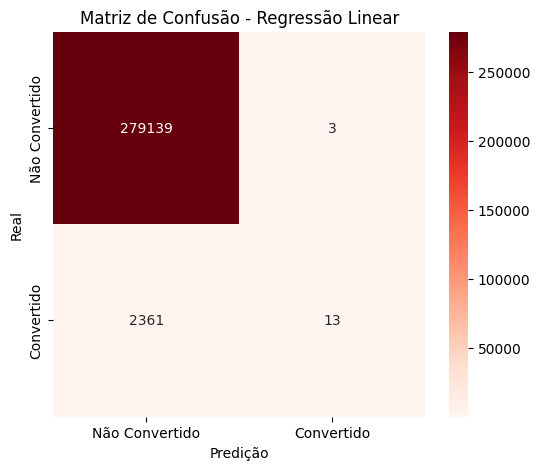

In [47]:
# Plotando para o modelo de Regressão Linear
plot_confusion_matrix(lr_model, X_test, y_test, "Regressão Linear")

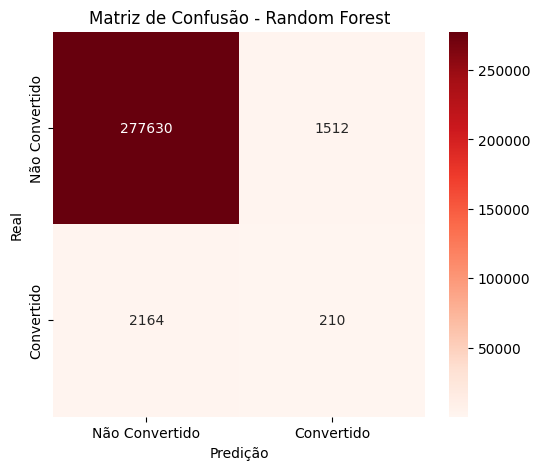

In [48]:
# Plotando para o modelo de Random Forest
plot_confusion_matrix(rf_model, X_test, y_test, "Random Forest")